## Auswertung Versuch 232: Michelson-Interferometer 

### Teil 1: Bestimmung der Wellenlänge des Lasers

In [24]:
#Importieren der benötigten Pakete
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit 

sa=1e-3*np.array([0.000,0.040,0.800,1.201,1.600]) #Anfangsposition
sa_err=0.009e-3*np.ones(5)
se=1e-3*np.array([2.975,3.015,3.973,4.173,4.572]) #Endposition
se_err=0.009e-3*np.ones(5)

m=np.array([11138,11153,11563,11343,11177]) #Anzahl Impulse
m_err=50*np.ones(5)

lam=2*(se-sa)/m #Wellenlänge
lam_sys=(4/(m**2)*(sa_err**2+se_err**2)+(2*(se-sa)*m_err/(m**2))**2)**0.5  #Fehlerfortpflanzung

lam_mean=np.mean(lam) #Mittelwertbilung 
lam_mean_sys=(np.sum(lam_sys**2)/len(lam_sys))**0.5 #syst. Fehler
lam_mean_std=np.std(lam)/np.sqrt(len(lam)) #stat. Fehler

print("Messergebnisse für Lambda [m]:")
print(lam)
print(lam_sys)
print()
print("Mittelwert mit syst. und stat. Fehler:")
print(str(np.mean(lam))+ ' +/- ' + str(lam_mean_sys)+ ' +/- ' +str(lam_mean_std) +' [m]')

lam_lit=532e-9 #Wert aus Anleitung
lam_lit_err=1e-9

#Prüfe auf Signifikanz
diff_1=np.abs(lam_mean-lam_lit)
diff_1_err=(lam_mean_sys**2+lam_lit_err**2)**0.5

diff_2=np.abs(lam_mean-lam_lit)
diff_2_err=(lam_mean_std**2+lam_lit_err**2)**0.5

print()
print("Differenz mit syst. Fehler: "+str(diff_1)+" +/- "+str(diff_1_err)+' [m]')
print("Differenz  mit stat. Fehler: "+str(diff_2)+" +/- "+str(diff_2_err)+' [m]')


Messergebnisse für Lambda [m]:
[  5.34207219e-07   5.33488747e-07   5.48819511e-07   5.24023627e-07
   5.31806388e-07]
[  3.31277987e-09   3.30599349e-09   3.23705179e-09   3.22056202e-09
   3.29345415e-09]

Mittelwert mit syst. und stat. Fehler:
5.34469098297e-07 +/- 3.27418593603e-09 +/- 3.59534086023e-09 [m]

Differenz mit syst. Fehler: 2.46909829719e-09 +/- 3.42349142597e-09 [m]
Differenz  mit stat. Fehler: 2.46909829719e-09 +/- 3.73181938218e-09 [m]


### Teil 2: Bestimmung des Brechungsindex von Luft

Brechungsindex erste Messung mit Fehler:
1.0002930327 +/- 6.5438148706e-07
Brechungsindex zweite Messung mit Fehler:
1.00027855064 +/- 2.57652796621e-06
Brechungsindex dritte Messung mit Fehler:
1.00027829301 +/- 2.85431595595e-06

Differenz erster Messwert mit Literaturwert:
1.30327024224e-05 +/- 6.5438148706e-07 (19.916062236)
Differenz zweiter Messwert mit Literaturwert:
1.44936152746e-06 +/- 2.57652796621e-06 (0.562525051724)
Differenz dritter Messwert mit Literaturwert:
1.7069947098e-06 +/- 2.85431595595e-06 (0.598039858288)

Mittelwert von n0 mit syst. & stat. Fehler:
1.00028329212 +/- 2.2519496048e-06 +/- 3.97704162641e-06
Differenz zwischen Mittelwert und Literaturwert:
3.29211539518e-06 +/- 2.2519496048e-06 +/- 3.97704162641e-06


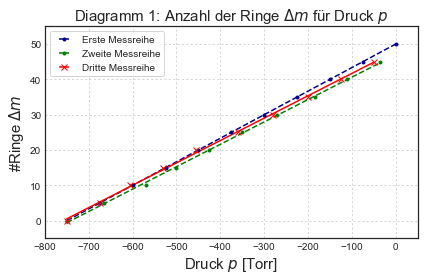

In [31]:
T_0=273.15
p_0=760 #in Torr, entspricht 101325 Pa
T=23.8+273.15 #Umrechnung in Kelvin
T_err=0.2
a=50e-3 #Innenmaß Küvette
a_err=0.05e-3

del_m=np.array([0,5,10,15,20,25,30,35,40,45,50])
p_1=-1*np.array([750,675,600,525,450,375,300,225,150,75,0])
p_2=-1*np.array([750,665,570,500,425,350,270,185,110,35])
p_3=-1*np.array([750,675,605,530,455,360,280,200,125,50])

p_1_err=-0.0006*p_1
p_2_err=-0.0006*p_2
p_3_err=-0.0006*p_3

plt.grid(ls=":")
plt.xlabel("Druck $p$ [Torr]",size=15)
plt.ylabel("#Ringe $\Delta m$",size=15)
plt.xlim(-800,50)
plt.ylim(-5,55)
plt.title("Diagramm 1: Anzahl der Ringe $\Delta m$ für Druck $p$", size=15)

def linear(x,a,b):
    return a*x+b

popt_1,pcov_1=curve_fit(linear,p_1,del_m)
popt_2,pcov_2=curve_fit(linear,p_2,del_m[:-1])
popt_3,pcov_3=curve_fit(linear,p_3,del_m[:-1])

plt.plot(p_1,linear(p_1,*popt_1),color="darkblue",linestyle='--')
plt.plot(p_2,linear(p_2,*popt_2),color="green",linestyle='--')
plt.plot(p_3,linear(p_3,*popt_3),color="red")

plt.errorbar(p_1,del_m,xerr=p_1_err,marker='.',color="darkblue",linestyle='',label="Erste Messreihe")
plt.errorbar(p_2,del_m[:-1],xerr=p_2_err,marker='.',color="green",linestyle='',label="Zweite Messreihe")
plt.errorbar(p_3,del_m[:-1],xerr=p_3_err,marker='x',color="red",linestyle='',label="Dritte Messreihe")
plt.legend(frameon=True)

plt.tight_layout()
plt.savefig('Diagramme/V232Diagramm1.pdf', format='PDF')

n_0_1=lam_lit*p_0*T/(2*a*T_0)*popt_1[0]+1
n_0_2=lam_lit*p_0*T/(2*a*T_0)*popt_2[0]+1
n_0_3=lam_lit*p_0*T/(2*a*T_0)*popt_3[0]+1

#Berechnung Mittelwert & dessen Fehler
n0=np.array([n_0_1,n_0_2,n_0_3])
n0_err=np.array([n_0_1_err,n_0_2_err,n_0_3_err])
n0_mean=np.mean(n0)
n0_mean_syst=(np.sum(n0_err**2)/len(n0_err))**0.5
n0_mean_std=np.std(n0)/np.sqrt(len(n0))

popt_1_err=pcov_1[0,0]**0.5
popt_2_err=pcov_2[0,0]**0.5
popt_3_err=pcov_3[0,0]**0.5

n_0_1_err=(n_0_1-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(popt_1_err/popt_1[0])**2)
n_0_2_err=(n_0_2-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(popt_2_err/popt_2[0])**2)
n_0_3_err=(n_0_3-1)*np.sqrt((lam_lit_err/lam_lit)**2+(a_err/a)**2+(T_err/T)**2+(popt_3_err/popt_3[0])**2)

print("Brechungsindex erste Messung mit Fehler:")
print(str(n_0_1) + ' +/- ' + str(n_0_1_err))

print("Brechungsindex zweite Messung mit Fehler:")
print(str(n_0_2) + ' +/- ' + str(n_0_2_err))

print("Brechungsindex dritte Messung mit Fehler:")
print(str(n_0_3) + ' +/- ' + str(n_0_3_err))

n_0_lit=1.00028 #Literaturwert

diff_1=np.abs(n_0_1-n_0_lit)
diff_2=np.abs(n_0_2-n_0_lit)
diff_3=np.abs(n_0_3-n_0_lit)
#gesuchte Differenz
diff_mean=np.abs(n0_mean-n_0_lit)

print()
print("Differenz erster Messwert mit Literaturwert:")
print(str(diff_1)+" +/- "+str(n_0_1_err)+" ("+str(diff_1/n_0_1_err)+")")
print("Differenz zweiter Messwert mit Literaturwert:")
print(str(diff_2)+" +/- "+str(n_0_2_err)+" ("+str(diff_2/n_0_2_err)+")")
print("Differenz dritter Messwert mit Literaturwert:")
print(str(diff_3)+" +/- "+str(n_0_3_err)+" ("+str(diff_3/n_0_3_err)+")")

print()
print("Mittelwert von n0 mit syst. & stat. Fehler:")
print(str(n0_mean)+ ' +/- '+ str(n0_mean_syst)+ ' +/- '+str(n0_mean_std))
print("Differenz zwischen Mittelwert und Literaturwert:")
print(str(diff_mean)+ ' +/- '+str(n0_mean_syst)+ ' +/- '+str(n0_mean_std))

### Teil 3: Messung der Kohärenzlänge einer Leuchtdiode

In [18]:
from scipy.signal import argrelextrema 
from scipy import signal 

#Auslesen der Messdaten 
data = np.genfromtxt (r'Daten/MessdatenV232.csv', delimiter = ",",  
                      skip_header =2, skip_footer =0, usecols = (0, 1)) 
x1 = data[0:, 0] 
y1 = data[0:, 1]    
    
#Um 0.02 sehr starkes "Rauschen" der Messwerte, deshalb werden diese Werte beim fitten der Gaußkurve ignoriert. 
mask1 = (y1>-0.002) 
 
y2 = y1[mask1] 
x2 = x1[mask1] 
 
#Bestimmung der lokalen Maxima 
mask2 = argrelextrema(y2, np.greater_equal, order = 1) 
y3 = y2[mask2] 
x3 = x2[mask2] 

#Korrektur der Maxima
dx=np.array([])
i=0
while i < len(x3)-1:
    dx=np.append(dx,x3[i+1]-x3[i])
    i = i+1
    
x_new=np.array([])
y_new=np.array([])
j=0
a=True
while j<len(x3)-1:
    if a:
        temp=np.array([j])
        a=False
    if dx[j-1]<0.001:
        temp=np.append(temp,j)
    else:
        dum=max(y3[temp])
        k=np.argmax(y3[temp])
        x_new=np.append(x_new,x3[temp[k]])
        y_new=np.append(y_new,dum)
        a=True
    j=j+1



Die Halbwertsbreite beträgt:
0.031449426321 +/- 0.000458248020542 [s]

Die Kohärenzlänge entspricht der Halbwertsbreite, umgerechnet in Längeneinheiten:
3.1449426321e-06 +/- 4.58248020542e-08 [m]


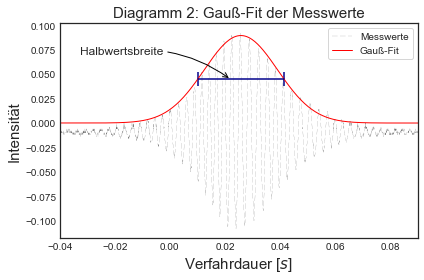

In [37]:
#Fitten der Gaußkurve 
def gaussian(x, mu, sigma, A):  
    return A / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / sigma**2 / 2) 
p = [0.01, 0.01, 0.01] 
popt, pcov = curve_fit(gaussian, x_new, y_new, p0 = p) 
  
 
 
#Plotten der Messdaten 
plt.plot(x1, y1, linewidth = 0.1, color = 'k', linestyle = '--') 

 
#Plotten des Fits 
x = np.linspace(x1[0],x1[-1], 1000) 
plt.plot(x, gaussian(x, *popt), 'r-', linewidth = 1) 
plt.legend(['Messwerte', 'Gauß-Fit'],frameon=True) 
plt.xlabel(r'Verfahrdauer [$s$]',size=15) 
plt.ylabel('Intensität',size=15) 
plt.title('Diagramm 2: Gauß-Fit der Messwerte', size=15) 
plt.xlim(-0.04,0.09)

#Berechnung & Plot der Halbwertsbreite
x_hwb=np.linspace(popt[0]-popt[1]*np.sqrt(2 * np.log(2)),popt[0]+popt[1]*np.sqrt(2 * np.log(2)),100)
y_hwb=0.5*gaussian(popt[0],*popt)*np.ones(100)

plt.plot(x_hwb,y_hwb,color='darkblue') 
plt.annotate(r'Halbwertsbreite',
             xy=(0.022,0.0447876012435), xycoords='data',
             xytext=(-150, 25), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.2"))

#Markierung der Halbwertsbreite
hwb_marker=0.007
plt.errorbar(x_hwb[0],0.0447876012435,yerr=hwb_marker,color='darkblue')
plt.errorbar(x_hwb[-1],0.0447876012435,yerr=hwb_marker,color='darkblue')

#Allgemeine Berechung für die HWB einer Gaußkurve 
halb=2*popt[1]*np.sqrt(2 * np.log(2))
halb_err=2*(pcov[1,1]**0.5)*np.sqrt(2 * np.log(2))
print("Die Halbwertsbreite beträgt:")
print(str(halb) + ' +/- ' + str(halb_err) + ' [s]')

#Umrechnung von Zeit in Länge -> Kohärenzlänge

v_verfahr=0.1e-3 #gemäß Anleitung 

koh=halb*v_verfahr
koh_err=halb_err*v_verfahr

print()
print("Die Kohärenzlänge entspricht der Halbwertsbreite, umgerechnet in Längeneinheiten:")
print(str(koh)+ ' +/- '  + str(koh_err) + ' [m]')


#speichern des Graphen 
plt.tight_layout()
plt.savefig('Diagramme/V232Diagramm2.pdf', format='PDF')